# Challenge - DS - Quilmes 
## Contexto
La empresa __Quilmes__ se encarga de las ventas de bienes de consumo masivos en un segmento B2B y cuenta con diferentes variedades de clientes que se conocen como puntos de ventas, la misma tiene una gran red de vendedores que se encargan de visitar a estos clientes de manera presencial.

El equipo de __Nivel De Servicio__ esta a cargo de todo lo relacionado a la experiencia del cliente en la venta Offline, es decir, a través de una visita del vendedor presencial, dentro de esto mismo puede ver diferentes aspectos como mejorar la calidad y optimizar los tiempos de las visitas de los vendedores, entender que productos son mas recomendable vender en los diferentes clientes, entender que tan eficientes son las visitas que se hacen, entre otras cosas.

El equipo de Nivel De Servicios contacto al de __Ciencia de Datos__ para entender cuál es la mejor manera de optimizar los tiempos de visita en los clientes, para lograr este objetivo se te solicita que generes un producto que permita entender cuál es la recomendación de tiempo de visita para cada uno de los clientes en base a distintas variables comerciales.

## Data 
Se suministra la siguiente información: 

dataset.csv 

- **cliente_id**: Codigo correspondiente a cada clientes 
- **aniomes**: Periodo correspondiente al registro año mes en formato yyyyMM 
- **canal**: Canal al que pertenece el clientes (Autoservicio, Kiosco/Maxiquiosco) 
- **region**: Region de la cual forma parte el cliente 
- **minutos_visitados_mes**: Minutos totales en el mes que se visito el cliente en 
cada periodo 
- **cantidad_heladeras**: Cantidad de heladeras que tenia el cliente en el periodo 
- **venta_total_negocios_mes**: Venta del total de los negocios que tuvo el cliente 
unidad Hl vendidos, esta venta puede no corresponder a la suma de los 
negocios por separados ya que incluye algunos productos que no se 
encuentran en los negocios (1,2,3,4) 
- **cantidad_productos_total_negocios_vendidos_mes**: Cantidad de productos 
distintos vendidos en la venta total de todos los negocios en cada periodo 
- **cantidad_compras_total_negocios_mes**: Cantidad de compras totales que el 
cliente hizo en el periodo 
- **dias_entre_compras_total_negocios_mes**: días pasados entre cada compra 
realizada dentro del periodo 
- **venta_negocio1_mes**: Venta correspondiente al negocio 1 en cada periodo, 
unidad Hl vendidos 
- **venta_negocio2_mes**: Venta correspondiente al negocio 2 en cada periodo, 
unidad Hl vendidos 
- **venta_negocio3_mes**: Venta correspondiente al negocio 3 en cada periodo, 
unidad Hl vendidos 
- **venta_negocio4_mes**: Venta correspondiente al negocio 4 en cada periodo, 
unidad Hl vendidos

## Objetivos
Esta herramienta permite estimar y priorizar el tiempo de visita mensual asignado a cada cliente, en base a su comportamiento reciente.

El objetivo principal es facilitar la toma de decisiones comerciales mediante un ranking regional que indique a qué clientes conviene dedicar más tiempo de visita, optimizando así la eficiencia de los recursos en el territorio.

Variable objetivo (target):

**minutos_visitados_mes**, que representa la duración total (en minutos) que se dedicó a visitar a un cliente en un mes determinado.

A partir de esta variable, se construye un score normalizado para generar rankings comparables entre regiones.

##  Tabla de Contenidos

1. [Importar librerías y raw data](#imports)  
2. [EDA + Preprocessing](#eda-visual)  
3. [Feature Engineering](#features)  
4. [Model Training & Evaluation](#model)
5. [Predicting on New Input Data](#7-predicting-on-new-input-data)

### 1. Importar librerías y raw data

In [2]:
import sys
sys.path.insert(0, './src/')
import pandas as pd
import importlib
import read_data
importlib.reload(read_data)
from read_data import load_dataset
import clean
importlib.reload(clean)
from clean import cleaning_pipeline
import feature_engineering
importlib.reload(feature_engineering)
from feature_engineering import features_eng, get_cat_num_features
import model
importlib.reload(model)
from model import split_data, train_model, evaluate_model, weighted_mae
import preprocesing
importlib.reload(preprocesing)
from preprocesing import pipeline_preprocesamiento_lr, preprocessor_cb
from sklearn.impute import SimpleImputer
from plots import plot_countplot


In [3]:
# Load Dataset
df = load_dataset()
df.head()

,cliente_id,aniomes,fecha,canal,region,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
0,3e1f078ba07f177421f0aefa1884347d,202501,2025-01-01,AUTOSERVICIO,LITORAL,31.600000,5.0,5.00946,23.0,45.0,0.577778,2.06946,2.94,0.000,0.00
1,58ae3b6ad98d3e3e4ba2b404c9142e0f,202504,2025-04-01,AUTOSERVICIO,GBA MINORISTAS,214.683333,4.0,6.65658,11.0,19.0,1.526316,0.19158,1.83,4.275,0.36
2,f3a854fb42adecbc313785f1f1629ffe,202407,2024-07-01,KIOSCOS/MAXIKIOSCOS,NEA,17.433333,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.000,0.00
3,e7d278a2f3c239afeaf9526d7e275401,202412,2024-12-01,KIOSCOS/MAXIKIOSCOS,LITORAL,24.733333,2.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.000,0.00
4,3f4bd1f117b18afa131c48de15486652,202411,2024-11-01,KIOSCOS/MAXIKIOSCOS,GBA MINORISTAS,11.166667,2.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.000,0.00


### 2. EDA y Preprocessing

En esta sección se ejecuta el pipeline de preprocesamiento definido a partir del análisis exploratorio realizado en la notebook `notebook/EDA.ipynb`.  
El objetivo es limpiar, transformar y preparar los datos para su posterior modelado, asegurando la calidad y consistencia de las variables relevantes para la estimación del tiempo de visita a clientes.

Para ver figuras y distribuciones ver la notebook correspondiente

In [4]:
target = 'minutos_visitados_mes'
cols_numericas = df.select_dtypes(include='number').drop(columns=['aniomes']).columns.tolist()
df_clean = cleaning_pipeline(df, target, cols_numericas)
df_clean.head()

,aniomes,cliente_id,fecha,canal,region,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
0,202405,0006d8e5e3b51edff13026e4d5ab88bc,2024-05-01,KIOSCOS/MAXIKIOSCOS,LITORAL,27.416667,0.0,0.4500,6.0,8.0,5.250000,0.2400,0.210,0.00,0.000
1,202405,000d20cbc63955e7ae987da6a57db588,2024-05-01,KIOSCOS/MAXIKIOSCOS,LITORAL,41.850000,1.0,0.2970,4.0,7.0,5.000000,0.2370,0.060,0.00,0.000
2,202405,000dad2279d96791f7429b069c96f0d5,2024-05-01,KIOSCOS/MAXIKIOSCOS,NOA,6.283333,1.0,0.0000,0.0,0.0,0.000000,0.0000,0.000,0.00,0.000
3,202405,00135b173a65719b0aa030e42aa77dbe,2024-05-01,AUTOSERVICIO,LITORAL,54.766667,2.0,9.5948,17.0,30.0,1.066667,4.6548,4.255,0.63,0.045
4,202405,0015af62171de29d9acc458d7a13915f,2024-05-01,KIOSCOS/MAXIKIOSCOS,CENTRAL,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000,0.00,0.000


In [6]:
df_clean.describe()

,aniomes,fecha,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
count,182442.000000,182442,182442.000000,182442.000000,182442.000000,182442.000000,182442.000000,182442.000000,182442.000000,182442.000000,182442.000000,182442.000000
mean,202444.846154,2024-10-31 07:23:04.615384320,57.343887,1.077537,2.940137,7.219045,12.567720,4.034865,1.476006,0.918885,0.497708,0.015610
min,202405.000000,2024-05-01 00:00:00,0.000000,0.000000,-4.652640,0.000000,0.000000,0.000000,-3.405600,-8.165000,-10.035000,0.000000
25%,202408.000000,2024-08-01 00:00:00,15.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202411.000000,2024-11-01 00:00:00,30.283333,0.000000,0.300000,4.000000,6.000000,1.350000,0.028380,0.030000,0.000000,0.000000
75%,202502.000000,2025-02-01 00:00:00,62.350000,2.000000,1.673865,10.000000,17.000000,3.750000,0.748365,0.510000,0.000000,0.000000
max,202505.000000,2025-05-01 00:00:00,1708.666667,78.000000,2069.747220,111.000000,591.000000,715.000000,1067.239360,2069.708840,678.780000,405.000000
std,46.018260,NaN,78.071796,1.748746,17.381170,9.323861,19.768943,12.145715,10.299667,10.306654,4.101705,1.284021


In [7]:
df_clean = pd.read_csv('./data/processed/df_feat.csv')

### Conclusiones principales del EDA

- El dataframe posee 25 duplicados los cuales han sido eliminados
- Existe un total de 14034 clientes únicos 
- Estos clientes se separan en 7 regiones distintas: [CENTRAL, COSTA ATLANTICA, GBA MINORISTAS, LITORAL, NEA, NOA, PATAGONIA]
- En cada región existen 2 canales: [AUTOSERVICIO, KIOSKOS/MAXIKIOSCOS], salvo en COSTA ATLÁNTICA Y PATAGONIA que solo existen clientes con AUTOSERVICIO 
- El primer mes registrado (2024-04) no posee información en variables numéricas (valores faltantes debido a historial previo) y por lo tanto se eliminan del data set
- Muchas variables numéricas poseen gran cantidad de outliers. Se cree que estos valores extremos se corresponden con clientes "especiales" o mayoristas y se considera que hay que mantenerlos como tal. 

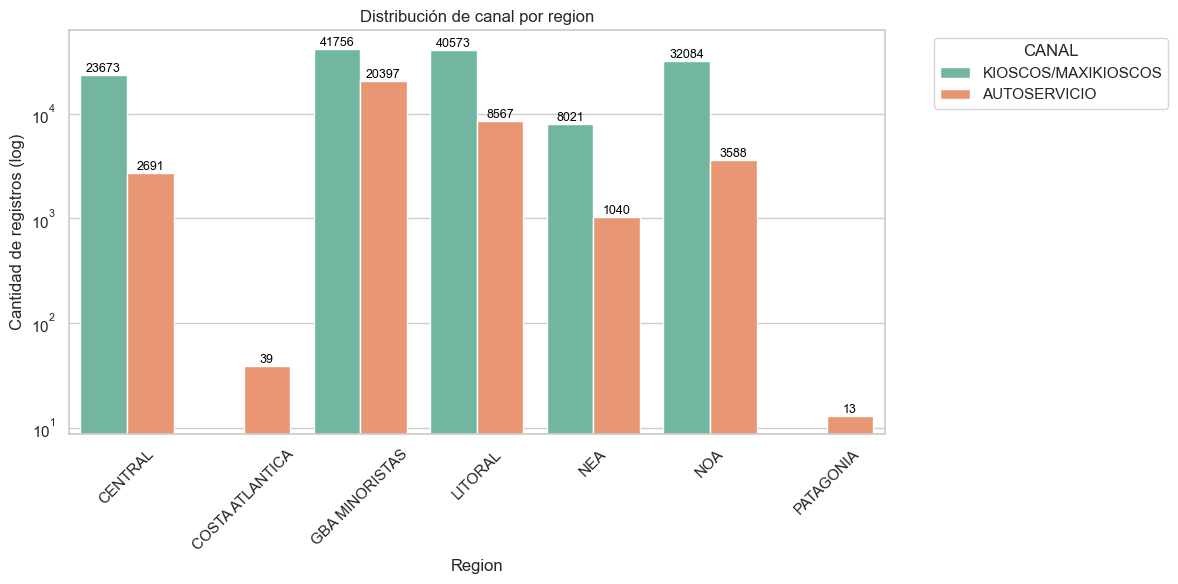

In [8]:
plot_countplot(df_clean, category_col='region', hue='canal')

Los mejores 10 clientes por venta total son:

In [9]:
ranking_ventas = df_clean.groupby('cliente_id')['venta_total_negocios_mes'].sum().reset_index()
ranking_ventas['ranking_ventas'] = ranking_ventas['venta_total_negocios_mes'].rank(method='dense', ascending=False).astype(int)
ranking_ventas = ranking_ventas.sort_values(by='venta_total_negocios_mes', ascending=False).reset_index(drop=True)
ranking_ventas.head(10)

,cliente_id,venta_total_negocios_mes,ranking_ventas
0,4287a574ace354de2bdb68b16cff63df,7088.26076,1
1,a8d7a94c59bd58456b330d1d496227ae,5756.94884,2
2,7c74aa66e32a6ab05b043b02cee501bb,5610.49097,3
3,cfdd0ec5a9c983616e7813cf9607ba92,4317.68456,4
4,4deed4cc9373a0c4fb3e07c8dc0e57a2,4233.57694,5
5,5e36317c7dabe9ba2764f6646144087d,4178.96192,6
6,8a3147de4de8217fee0eae411fe45f29,3380.80718,7
7,bd4c9ab730f5513206b999ec0d90d1fb,3245.46133,8
8,e7b535b278ad6f9fd2a69ede17cb7e2c,2982.48012,9
9,97a3e6ef2f020ad96eb92185cc8727d4,2762.41504,10


Los últimos 10:

In [10]:
ranking_ventas.tail(10)

,cliente_id,venta_total_negocios_mes,ranking_ventas
14024,e6b04c3a54bdaf533eb32073bfaba0c3,0.0,11716
14025,851047d854e11b5dfded8c892d38870d,0.0,11716
14026,85113c57835ad491c6a2672e891e0299,0.0,11716
14027,073baedbb0d3fb04a184cef1b06c5f4f,0.0,11716
14028,23d60a8ba34acd334a6985f1820f11ea,0.0,11716
14029,e67527564bc378e1db64c361552c3941,0.0,11716
14030,85864107747a36ebaaa8729629614138,0.0,11716
14031,e670f3fabd9210031117a56386650f72,0.0,11716
14032,e6536fa08bd953ce2fd2492e7878ce0c,0.0,11716
14033,cd0bc69213f64536e811e8906e2bd39a,0.0,11716


### Las ventas por cada negocio son:

In [11]:
ventas_por_negocio = {
    col: df_clean[col].sum()
    for col in ['venta_negocio1_mes', 'venta_negocio2_mes', 'venta_negocio3_mes', 'venta_negocio4_mes']
}
negocio_mayor_ventas = max(ventas_por_negocio, key=ventas_por_negocio.get)
ventas_por_negocio

{'venta_negocio1_mes': 269285.42011000006,
 'venta_negocio2_mes': 167643.14455000003,
 'venta_negocio3_mes': 90802.75850000001,
 'venta_negocio4_mes': 2847.8700000000003}

Siendo el negocio 1 el que más vende

### 3. Feature Engineering

A partir de las features disponibles se crearon nuevas que aportan información al problema:
- 'venta_por_heladera' : venta total en función de la cantidad de heladeras 
- 'ratio_negX' : venta del negocio X sobre la venta total
- 'productos_por_compra' : cantidad de productos/cantidad de compras
- 'venta_promedio_x_compra' : venta total / cantidad compras total 
- 'flag_ventas' : 0 si la suma es 0, y si no

In [12]:
feat = ['cliente_id',
        'aniomes',
        'region',
        'canal',
        'cantidad_heladeras',
         'venta_total_negocios_mes',
         'cantidad_productos_total_negocios_vendidos_mes',
         'cantidad_compras_total_negocios_mes',
         'dias_entre_compras_total_negocios_mes',
         'venta_negocio1_mes',
         'venta_negocio2_mes',
         'venta_negocio3_mes',
         'venta_negocio4_mes',
         'productos_por_compra',
         'venta_promedio_x_compra',
         'venta_por_heladera',
         'ratio_neg1',
         'ratio_neg2',
         'ratio_neg3',
         'ratio_neg4',
         'flag_suma_ventas_0'
         ]

In [13]:
df_feat = features_eng(df_clean)[feat + [target]].copy()

### 4. Model Training & Evaluation


En la notebook **`notebooks/model.ipynb`** se desarrollan y evalúan diferentes enfoques para la predicción de la variable objetivo.


Se implementan y comparan dos modelos:

* **Linear Regression**, con variables categóricas transformadas mediante One-Hot Encoding y numéricas con RobustScaler.
* **CatBoost**, que aprovecha su capacidad inherente para manejar directamente variables categóricas y numéricas sin necesidad de escalado ni codificación explícita.



---
El data set se separa en entrenamiento, validación y prueba.


- Entrenamiento: datos hasta la fecha de corte 2025-04.

- Validación: datos correspondientes a 2025-04.

- Prueba: datos de 2025-05.

Esta segmentación temporal permite evaluar el modelo de forma coherente con la naturaleza secuencial de los datos, evitando fugas de información entre periodos.

---


Los modelos se evalúan en el conjunto de validación considerando:

- MAE y RMSE como métricas principales de error.

- Intervalos de confianza al 95% calculados mediante bootstrap.

- Comparación de desempeño contra un DummyRegressor como referencia base (baseline).

- Una métrica personalizada alineada con objetivos de negocio.

Se prioriza el MAE como métrica principal por su interpretación directa en las unidades de la variable objetivo, su menor sensibilidad a valores atípicos y su capacidad para representar la desviación promedio de manera más robusta que métricas cuadráticas. Esto resulta adecuado dada la distribución y características del problema.

La métrica personalizada complementa la evaluación técnica permitiendo medir el grado en que el modelo satisface criterios estratégicos definidos por el negocio.


La métrica personalizada se define como:

\begin{equation}
\text{WMAE} = \frac{\sum_{i=1}^n w_i \cdot |y_i - \hat{y}_i|}{\sum_{i=1}^n w_i}
\end{equation}


donde:

- $y_i$ es el valor real de la observación $i$,
- $\hat{y}_i$ es la predicción para la observación $i$,
- $w_i$ es el peso asignado a la observación $i$, basado en si el cliente forma parte del 80% de las ventas de la empresa o no. Si forma parte $w_i=2$ sino 1. - se puede modificar -




A su vez, éstos pesos pueden utilizarse para sectorizar a los clientes :

Grupo 1: Clientes que representan el 80% acumulado de las ventas totales de la empresa.

Grupo 0: Clientes que contribuyen al 20% restante de las ventas.

### Split data

In [15]:
df_train, df_valid, df_test = split_data(df_feat)

### Calculo de weights para la custom function

In [16]:
ventas_historicas = (
    df_train.groupby("cliente_id")["venta_total_negocios_mes"]
    .sum()
    .reset_index()
    .rename(columns={"venta_total_negocios_mes": "ventas_totales"})
)

ventas_historicas = ventas_historicas.sort_values("ventas_totales", ascending=False)

# Calcular % acumulado
ventas_historicas["porc_acum"] = ventas_historicas["ventas_totales"].cumsum() / ventas_historicas["ventas_totales"].sum()

# Marcar los que representan el 80% de las ventas
ventas_historicas["top_80"] = ventas_historicas["porc_acum"] <= 0.8

# top 80%
clientes_top80 = ventas_historicas[ventas_historicas["top_80"]]

w_train = df_train['cliente_id'].isin(clientes_top80['cliente_id'])
w_valid = df_valid['cliente_id'].isin(clientes_top80['cliente_id'])
w_test = df_test['cliente_id'].isin(clientes_top80['cliente_id'])


### Separar features de target

In [108]:
cat_features, num_features = get_cat_num_features(df_train)

3 variables categóricas
19 variables numéricas
22 variables en total


In [109]:
num_features = [col for col in num_features if col not in ['aniomes', target]]
cat_features = [col for col in cat_features if col not in ['cliente_id']]
X_train, y_train = df_train[cat_features + num_features], df_train[target]
X_valid, y_valid = df_valid[cat_features + num_features], df_valid[target]
X_test, y_test = df_test[cat_features + num_features], df_test[target]

Entrenar modelo o cargar modelo entrenado

In [110]:
train = True  # Set to False to load a pre-trained model / True to train the model

cat_features, num_features = get_cat_num_features(X_train)

models = ['linear', 'catboost'] # List of models to train
model_name = 'catboost'

if train:
    if model_name == 'catboost':
        preprocessor = preprocessor_cb(cat_features, num_features, fit=True, X=X_train, y=y_train)
        model_train = train_model(X_train, y_train, model_name=model_name, version='1', preprocessor=preprocessor)

    elif model_name == 'linear':
        preprocessor = pipeline_preprocesamiento_lr(num_features,\
                        cat_features, categorical_strategy='onehot', fit=True, X=X_train, y=y_train)
        model_train = train_model(X_train, y_train, model_name=model_name, version='1', preprocessor=preprocessor)

else:
    if model_name == 'catboost':
        import joblib
        model_train = joblib.load('models/modelo_catboost.pkl')
    if model_name == 'linear':
        import joblib
        model_train = joblib.load('models/linear_model.pkl')


2 variables categóricas
17 variables numéricas
19 variables en total
Modelo guardado en modelo_catboost_1.pkl


In [111]:
model_train

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('feature_eng',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('imputation',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  fill_value='NA',
                                                                                                  strategy='constant'))]),
                                                                   ['region',
                                                                    'canal']),
                                                                  ('num',
                                                                   Pipeline(steps=[('imputation_none',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='median'))]),
                                                                   ['ca...
                                                                    'cantidad_compras_total_negocios_mes',
                                                                    'dias_entre_compras_total_negocios_mes',
                                                                    'venta_negocio1_mes',
                                                                    'venta_negocio2_mes',
                                                                    'venta_negocio3_mes',
                                                                    'venta_negocio4_mes',
                                                                    'productos_por_compra',
                                                                    'venta_promedio_x_compra',
                                                                    'venta_por_heladera',
                                                                    'ratio_neg1',
                                                                    'ratio_neg2',
                                                                    'ratio_neg3',
                                                                    'ratio_neg4',
                                                                    'flag_suma_ventas_0'])]))])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x000001AE858AE370>)])

In [112]:
pred_valid = model_train.predict(X_valid)
pred_test = model_train.predict(X_test)

In [115]:
mae_train, rmse_train, r2_train, dummy_mae_train, dummy_rmse_train, dummy_r2_train = evaluate_model(model_train, X_train, y_train, return_metrics=True)  


 performance:
----------------------------------
 Model Evaluation Summary:
----------------------------------
 MAE: 26.14 min 
95% Confidence Interval for MAE: 25.94 min – 26.36 min

RMSE: 51.10 min 
95% Confidence Interval for RMSE: 50.05 min – 52.18 min

R2: 0.58 min 
95% Confidence Interval for R2: 0.57 min – 0.59 min

Comparison vs baseline (dum. regressor using mean):
--------------------------------------------------------
 MAE (Dummy): 50.90 min -  improvement: 24.76 min
 RMSE (Dummy): 79.15 min  -  improvement: 28.05 min


In [116]:
mae_valid, rmse_valid, r2_valid, dummy_mae_valid, dummy_rmse_valid, dummy_r2_valid = evaluate_model(model_train, X_valid, y_valid, return_metrics=True)  



 performance:
----------------------------------
 Model Evaluation Summary:
----------------------------------
 MAE: 22.56 min 
95% Confidence Interval for MAE: 22.10 min – 23.08 min

RMSE: 38.69 min 
95% Confidence Interval for RMSE: 37.12 min – 40.21 min

R2: 0.68 min 
95% Confidence Interval for R2: 0.66 min – 0.70 min

Comparison vs baseline (dum. regressor using mean):
--------------------------------------------------------
 MAE (Dummy): 46.85 min -  improvement: 24.28 min
 RMSE (Dummy): 68.39 min  -  improvement: 29.71 min


### Feature Importance

In [117]:
df_importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model_train.steps[-1][1].feature_importances_
})

# Filtrar solo importancias > 0 y ordenar
df_importances = df_importances[df_importances["importance"] > 0] \
                                .sort_values(by="importance", ascending=False)

print(df_importances)

                                           feature  importance
1                                            canal   53.924181
0                                           region   10.102739
2                               cantidad_heladeras    9.627404
6            dias_entre_compras_total_negocios_mes    4.730963
4   cantidad_productos_total_negocios_vendidos_mes    3.598877
11                            productos_por_compra    2.785441
5              cantidad_compras_total_negocios_mes    2.601518
12                         venta_promedio_x_compra    1.873467
7                               venta_negocio1_mes    1.616514
8                               venta_negocio2_mes    1.522607
3                         venta_total_negocios_mes    1.411950
14                                      ratio_neg1    1.278450
15                                      ratio_neg2    1.091977
13                              venta_por_heladera    0.843707
16                                      ratio_neg3    0

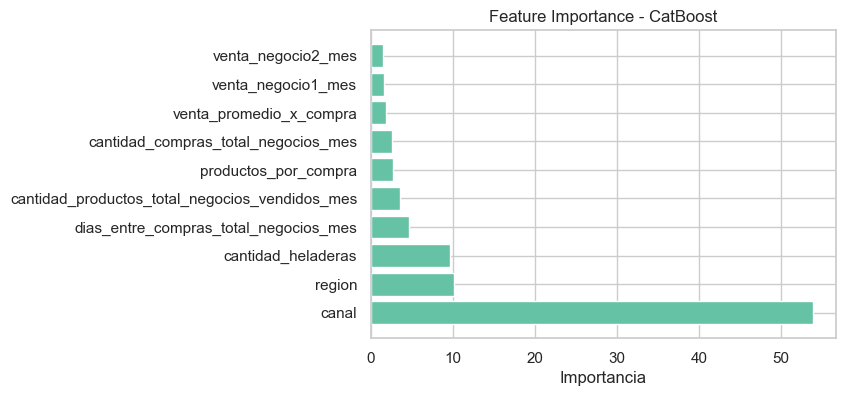

In [118]:
import matplotlib.pyplot as plt
feature_importances = model_train.steps[-1][1].get_feature_importance()
plt.figure(figsize=(6,4))
plt.barh(df_importances['feature'][0:10], df_importances['importance'][0:10])
plt.xlabel('Importancia')
plt.title('Feature Importance - CatBoost')
plt.show()

## Predicción en Test

In [119]:
mae_test, rmse_test, r2_test, dummy_mae_test, dummy_rmse_test, dummy_r2_test = evaluate_model(model_train, X_test, y_test, return_metrics=True)  


 performance:
----------------------------------
 Model Evaluation Summary:
----------------------------------
 MAE: 26.36 min 
95% Confidence Interval for MAE: 25.78 min – 27.00 min

RMSE: 46.00 min 
95% Confidence Interval for RMSE: 44.32 min – 47.61 min

R2: 0.62 min 
95% Confidence Interval for R2: 0.61 min – 0.64 min

Comparison vs baseline (dum. regressor using mean):
--------------------------------------------------------
 MAE (Dummy): 51.70 min -  improvement: 25.33 min
 RMSE (Dummy): 74.94 min  -  improvement: 28.94 min


In [120]:
# Save predictions
predictions = model_train.predict(X_test)
df_predictions = pd.DataFrame({
    'id': X_test.index,
    'real': y_test,
    'prediction': predictions
})
df_predictions.to_csv('data/predictions/predictions.csv', index=False)

In [121]:
# Tabla de métricas
metrics = pd.DataFrame({
    'Métrica': ['RMSE', 'MAE', 'R2'],
    'Valor_train': [rmse_train, mae_train, r2_train],
    'Baseline_train': [dummy_rmse_train, dummy_mae_train, dummy_r2_train],
    'Valor_valid': [rmse_valid, mae_valid, r2_valid],
    'Baseline_valid': [dummy_rmse_valid, dummy_mae_valid, dummy_r2_valid],
    'Valor_test': [rmse_test, mae_test, r2_test],
    'Baseline_test': [dummy_rmse_test, dummy_mae_test, dummy_r2_test]
})
metrics['Mejora_train'] = metrics['Baseline_train'] - metrics['Valor_train']
metrics['Mejora_valid'] = metrics['Baseline_valid'] - metrics['Valor_valid']
metrics['Mejora_test'] = metrics['Baseline_test'] - metrics['Valor_test']
metrics.to_csv('metrics.csv', index=False)

### Score y Ranking por región

In [122]:
df_test = df_feat[df_feat['aniomes'] == 202505]

In [123]:
df_pred = pd.concat([df_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(pred_test, name='minutos_recomendados')], axis=1)

### Definición de norma entre 0 y 1

In [124]:
df_pred['score_normalizado'] = df_pred.groupby('region')['minutos_recomendados'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) != 0 else 0
)

In [125]:
df_pred['ranking_region'] = df_pred.groupby('region')['score_normalizado'] \
                                   .rank(method='dense', ascending=False) \
                                   .astype(int)

# Mostrar resultado
print(df_pred[['cliente_id', 'region', 'minutos_recomendados', 'score_normalizado', 'ranking_region']].head())

                         cliente_id   region  minutos_recomendados  \
0  0006d8e5e3b51edff13026e4d5ab88bc  LITORAL             27.716805   
1  000d20cbc63955e7ae987da6a57db588  LITORAL             34.149485   
2  000dad2279d96791f7429b069c96f0d5      NOA             17.464235   
3  00135b173a65719b0aa030e42aa77dbe  LITORAL            170.711839   
4  0015af62171de29d9acc458d7a13915f  CENTRAL             41.959719   

   score_normalizado  ranking_region  
0           0.072203            2205  
1           0.088960            1318  
2           0.068243            1659  
3           0.444710             249  
4           0.162452             401  


In [ ]:
with pd.ExcelWriter('ranking_visitas.xlsx') as writer:
    for region, grupo in df_pred.groupby('region'):
        grupo.sort_values('ranking_region').to_excel(writer, sheet_name=region, index=False)

--- 

### Extras: 
Cómo avanzaría:
- Entrenar modelos para distintos grupos según sus ventas
- Definir pesos según el cliente en el entrenamiento
- Afinar outliers o entrenarlos por separado

---

### Se entrena un modelo para el grupo 1 
Grupo 1: Clientes que representan el 80% acumulado de las ventas totales de la empresa.

Grupo 0: Clientes que contribuyen al 20% restante de las ventas.



In [17]:
df = df_feat.copy()

In [19]:
msk = df['cliente_id'].isin(clientes_top80['cliente_id'])
df_top = df[msk]
df_notop = df[~msk]

df_train_top, df_valid_top, df_test_top = split_data(df_top)
cat_features, num_features = get_cat_num_features(df_train_top)

3 variables categóricas
19 variables numéricas
22 variables en total


In [20]:
num_features = [col for col in num_features if col not in ['aniomes', target]]
cat_features = [col for col in cat_features if col not in ['cliente_id']]
X_train_top, y_train = df_train_top[cat_features + num_features], df_train_top[target]
X_valid_top, y_valid = df_valid_top[cat_features + num_features], df_valid_top[target]
X_test_top, y_test = df_test_top[cat_features + num_features], df_test_top[target]

In [21]:
train = True  # Set to False to load a pre-trained model / True to train the model

models = ['linear', 'catboost'] # List of models to train
model_name = 'catboost'

if train:
    if model_name == 'catboost':
        preprocessor = preprocessor_cb(cat_features, num_features, fit=True, X=X_train_top, y=y_train)
        model_train = train_model(X_train_top, y_train, model_name=model_name, version='top', preprocessor=preprocessor)

    elif model_name == 'linear':
        preprocessor = pipeline_preprocesamiento_lr(num_features,\
                        cat_features, categorical_strategy='onehot', fit=True, X=X_train_top, y=y_train)
        model_train = train_model(X_train_top, y_train, model_name=model_name, version='top', preprocessor=preprocessor)

else:
    if model_name == 'catboost':
        import joblib
        model_train = joblib.load('models/modelo_catboost.pkl')
    if model_name == 'linear':
        import joblib
        model_train = joblib.load('models/linear_model.pkl')


Modelo guardado en modelo_catboost_top.pkl


In [22]:
evaluate_model(model_train, X_train_top, y_train, return_metrics=False)


 performance:
----------------------------------
 Model Evaluation Summary:
----------------------------------
 MAE: 55.56 min 
95% Confidence Interval for MAE: 54.68 min – 56.56 min

RMSE: 90.58 min 
95% Confidence Interval for RMSE: 87.78 min – 93.33 min

R2: 0.43 min 
95% Confidence Interval for R2: 0.41 min – 0.44 min

Comparison vs baseline (dum. regressor using mean):
--------------------------------------------------------
 MAE (Dummy): 88.78 min -  improvement: 33.23 min
 RMSE (Dummy): 119.73 min  -  improvement: 29.15 min


---

### Se entrena un modelo separando outliers en el target

In [126]:
df = df_feat.copy()

In [127]:
msk = df[target] < df[target].quantile(0.99)
df['outlier'] = ~msk

In [128]:
df['outlier'] = df['outlier'].astype(int)
df['outlier']

0         0
1         0
2         0
3         0
4         0
         ..
182437    0
182438    0
182439    0
182440    0
182441    0
Name: outlier, Length: 182442, dtype: int32

<Axes: >

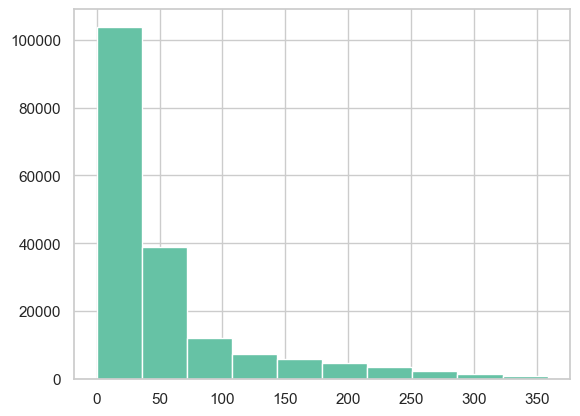

In [129]:
df[target][df['outlier']==0].hist()

### Modelo sin outliers

In [130]:
df_train, df_valid, df_test = split_data(df[df['outlier']==0])
cat_features, num_features = get_cat_num_features(df_train)

3 variables categóricas
20 variables numéricas
23 variables en total


In [131]:
num_features = [col for col in num_features if col not in ['aniomes', target, 'outlier']]
cat_features = [col for col in cat_features if col not in ['cliente_id']]
X_train, y_train = df_train[cat_features + num_features], df_train[target]
X_valid, y_valid = df_valid[cat_features + num_features], df_valid[target]
X_test, y_test = df_test[cat_features + num_features], df_test[target]

In [ ]:
train = True  # Set to False to load a pre-trained model / True to train the model

models = ['linear', 'catboost'] # List of models to train
model_name = 'catboost'

if train:
    if model_name == 'catboost':
        preprocessor = preprocessor_cb(cat_features, num_features, fit=True, X=X_train, y=y_train)
        model_train = train_model(X_train, y_train, model_name=model_name, version='sin_out', preprocessor=preprocessor)

    elif model_name == 'linear':
        preprocessor = pipeline_preprocesamiento_lr(num_features,\
                        cat_features, categorical_strategy='onehot', fit=True, X=X_train, y=y_train)
        model_train = train_model(X_train, y_train, model_name=model_name, version='sin_out', preprocessor=preprocessor)

else:
    if model_name == 'catboost':
        import joblib
        model_train = joblib.load('models/modelo_catboost.pkl')
    if model_name == 'linear':
        import joblib
        model_train = joblib.load('models/linear_model.pkl')


Modelo guardado en modelo_catboost_g0.pkl


In [133]:
pred_train = model_train.predict(X_train)
pred_valid = model_train.predict(X_valid)
pred_test = model_train.predict(X_test)

In [134]:
evaluate_model(model_train, X_train, y_train)


 performance:
----------------------------------
 Model Evaluation Summary:
----------------------------------
 MAE: 23.20 min 
95% Confidence Interval for MAE: 23.05 min – 23.36 min

RMSE: 38.31 min 
95% Confidence Interval for RMSE: 37.98 min – 38.60 min

R2: 0.65 min 
95% Confidence Interval for R2: 0.64 min – 0.65 min

Comparison vs baseline (dum. regressor using mean):
--------------------------------------------------------
 MAE (Dummy): 44.80 min -  improvement: 21.60 min
 RMSE (Dummy): 64.42 min  -  improvement: 26.11 min


In [135]:
evaluate_model(model_train, X_test, y_test)


 performance:
----------------------------------
 Model Evaluation Summary:
----------------------------------
 MAE: 25.06 min 
95% Confidence Interval for MAE: 24.53 min – 25.56 min

RMSE: 41.43 min 
95% Confidence Interval for RMSE: 40.46 min – 42.55 min

R2: 0.63 min 
95% Confidence Interval for R2: 0.62 min – 0.65 min

Comparison vs baseline (dum. regressor using mean):
--------------------------------------------------------
 MAE (Dummy): 48.35 min -  improvement: 23.29 min
 RMSE (Dummy): 68.36 min  -  improvement: 26.92 min
